### 자연어 처리 리뷰활용
* konlpy를 이용한 자연어처리
* 64bit mem 8G 이상 요망


In [1]:
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

### 형태소 분석기 초기화

In [2]:
hannanum = Hannanum()
kkma = Kkma()
# komoran = Komoran() 메모리
###mecab = Mecab() 윈도우 지원 안해
okt = Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:

c="안녕하세요 여러분"
kkma.nouns(c[:40])
#hannanum.nouns(c[:40])
#pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
#pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['안녕', '여러분']

In [4]:
dbname="bank.db"

In [7]:
def seldb(tcode):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT
        from kb
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append(d[2])
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)

In [8]:
gdata=seldb(3)
print(gdata[1][:10])

OperationalError: no such table: kb

In [17]:
nt=[]
for s in gdata[1]:
    ns=kkma.nouns(s)
    nt.append(ns)
print(nt)

[]


In [18]:
ntall=[]
for n in gdata[1]:
    
    ntall.extend(n)
print(ntall)    

[]


In [19]:
from collections import Counter
count = Counter(ntall)
print(count)

Counter()


In [20]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
#plt.rcParams["font.family"] = 'Malgun Gothic'
from wordcloud import WordCloud
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()
print(c[:100])


대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [24]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 800,
    height = 800
)
w=w.generate(c)

In [25]:
w.words_
print(w)

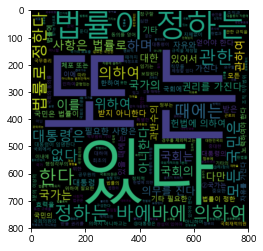

In [26]:
plt.imshow(w,interpolation='bilinear')

In [27]:
f = open("stopkr.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    print(line)
f.close()

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence

In [28]:
import csv
f = open('stopkr.txt', 'r', encoding='utf-8')
rdr = csv.reader(f)
stopword=[]
for line in rdr:
    stopword.append(line[0])
f.close() 
print(stopword[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [29]:
from nltk.tokenize import word_tokenize 
w=word_tokenize(c)
